<a href="https://colab.research.google.com/github/ManishPrasad0511/gw_open_data_workshop_2022/blob/main/challenge_1_and_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img style="float: left;padding: 1.3em" src="https://raw.githubusercontent.com/gw-odw/odw-2022/main/Tutorials/logo.png">  

#  Gravitational Wave Open Data Workshop #5


#### Data Challenge

This notebook covers my code for the challenge 1 and challenge 2 of the data challenge. [Click this link to view data challenges](https://github.com/gw-odw/odw-2022/blob/main/Challenge/README.md)

## Initialization

In [18]:
! pip install -q lalsuite
! pip install -q gwpy
! pip install -q pycbc
! pip install matplotlib==3.2.2

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached matplotlib-3.2.2-cp37-cp37m-manylinux1_x86_64.whl (12.4 MB)
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.5.2
    Uninstalling matplotlib-3.5.2:
      Successfully uninstalled matplotlib-3.5.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gwpy 2.1.4 requires matplotlib>=3.3.0, but you have matplotlib 3.2.2 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


## Challenge 1

In [19]:
# -- download data
! wget https://www.gw-openscience.org/s/workshop3/challenge/challenge1.gwf

--2022-06-27 18:43:01--  https://www.gw-openscience.org/s/workshop3/challenge/challenge1.gwf
Resolving www.gw-openscience.org (www.gw-openscience.org)... 131.215.113.73
Connecting to www.gw-openscience.org (www.gw-openscience.org)|131.215.113.73|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4025674 (3.8M)
Saving to: ‘challenge1.gwf.2’

challenge1.gwf.2    100%[===================>]   3.84M  2.92MB/s    in 1.3s    

2022-06-27 18:43:03 (2.92 MB/s) - ‘challenge1.gwf.2’ saved [4025674/4025674]



In [20]:
# -- for gwpy 
import gwpy
from gwpy.timeseries import TimeSeries
gwpy_strain = TimeSeries.read('challenge1.gwf', channel="H1:CHALLENGE1")

In [21]:
print(gwpy_strain)

TimeSeries([ 1.09389188e-21,  1.21228706e-22,  1.64565889e-24,
            ..., -4.43135131e-23, -2.34576855e-22,
             4.51019899e-22]
           unit: ct,
           t0: -64.0 s,
           dt: 0.000244140625 s,
           name: H1:CHALLENGE1,
           channel: H1:CHALLENGE1)


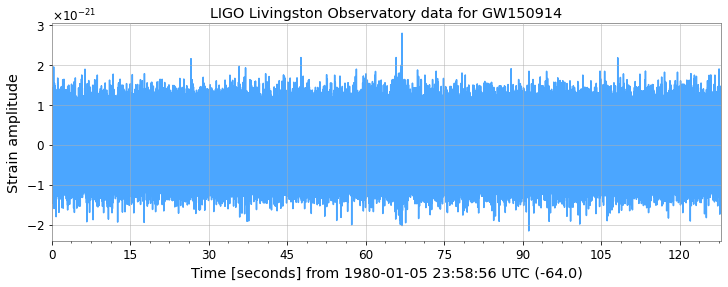

In [22]:
plot = gwpy_strain.plot(
    title="LIGO Livingston Observatory data for GW150914",
    ylabel="Strain amplitude",
    color="gwpy:ligo-livingston")
plot.show()

In [23]:
from gwpy.time import to_gps
to_gps('Jan 6 1980 00:00:00')

LIGOTimeGPS(0, 0)

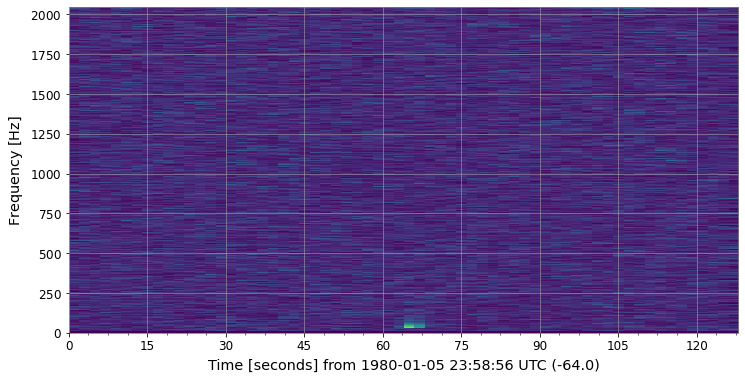

In [24]:
specgram = gwpy_strain.spectrogram2(fftlength=4, overlap=2, window='hann') ** (1/2.)
plot = specgram.plot()

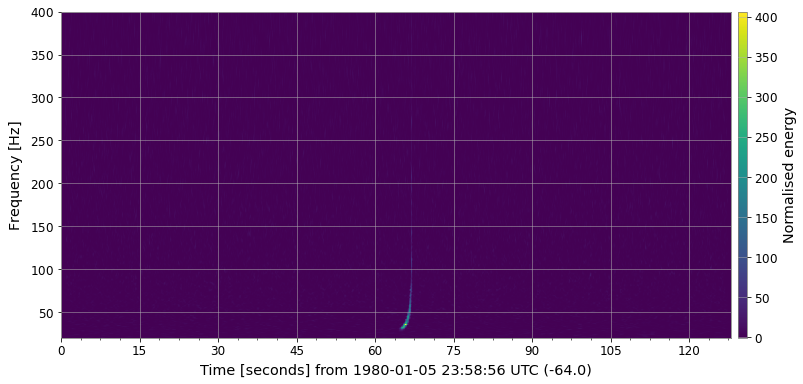

In [25]:
gwpy_strain_q = gwpy_strain.q_transform(frange=(20, 400), qrange=(80, 110))
plot = gwpy_strain_q.plot()
ax = plot.gca()
ax.colorbar(label="Normalised energy")

## Challenge 2

In [26]:
# -- download data
! wget https://www.gw-openscience.org/s/workshop3/challenge/challenge2.gwf

--2022-06-27 18:43:10--  https://www.gw-openscience.org/s/workshop3/challenge/challenge2.gwf
Resolving www.gw-openscience.org (www.gw-openscience.org)... 131.215.113.73
Connecting to www.gw-openscience.org (www.gw-openscience.org)|131.215.113.73|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4025842 (3.8M)
Saving to: ‘challenge2.gwf.2’

challenge2.gwf.2    100%[===================>]   3.84M  3.19MB/s    in 1.2s    

2022-06-27 18:43:12 (3.19 MB/s) - ‘challenge2.gwf.2’ saved [4025842/4025842]



In [27]:
# -- for gwpy 
gwpy_strain_2 = TimeSeries.read('challenge2.gwf', channel="H1:CHALLENGE2")

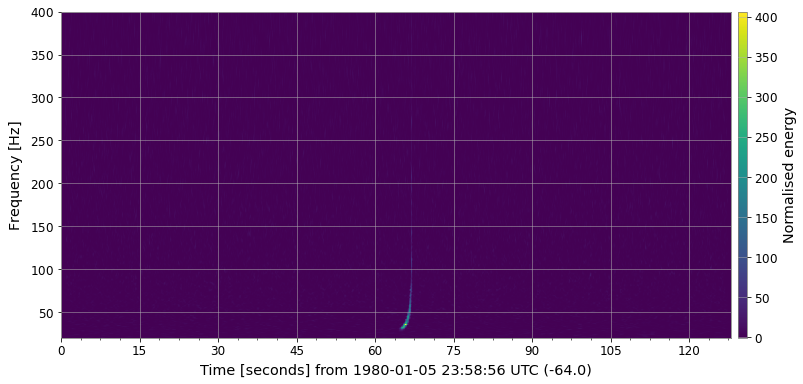

In [28]:
gwpy_strain_2_q = gwpy_strain.q_transform(frange=(20, 400), qrange=(80, 110))
plot = gwpy_strain_q.plot()
ax = plot.gca()
ax.colorbar(label="Normalised energy")

In [29]:
from pycbc.catalog import Merger
from pycbc.filter import resample_to_delta_t, highpass, lowpass
from pycbc.psd import interpolate, inverse_spectrum_truncation
from pycbc.waveform import get_td_waveform
from pycbc.filter import matched_filter

In [30]:
from pycbc import frame
pycbc_strain = frame.read_frame('challenge2.gwf', 'H1:CHALLENGE2')

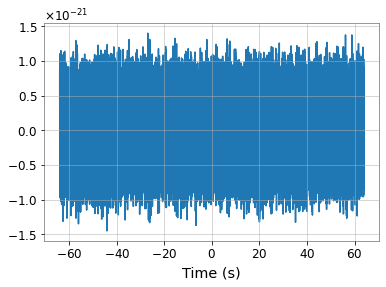

In [31]:
import pylab
pylab.plot(pycbc_strain.sample_times, pycbc_strain)
pylab.xlabel('Time (s)')
pylab.show()

Text(0, 0.5, 'Strain')

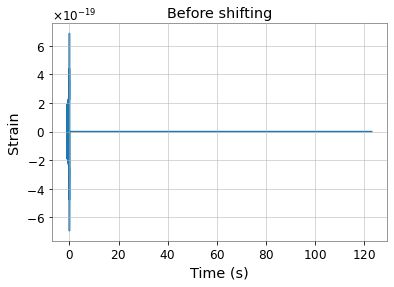

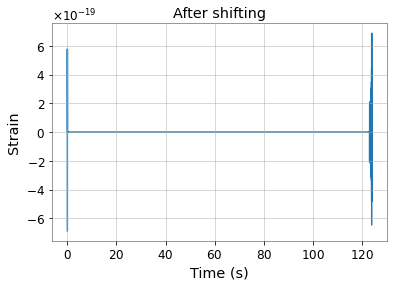

In [32]:
ts = pycbc_strain
strain = highpass(ts, 20)
strain = resample_to_delta_t(strain, 1.0/2048)
conditioned = strain.crop(2, 2)

m = 30
hp, hc = get_td_waveform(approximant="SEOBNRv4_opt",
mass1=m,
mass2=m,
delta_t=conditioned.delta_t,
f_lower=20)
hp.resize(len(conditioned))
template = hp.cyclic_time_shift(hp.start_time)

pylab.figure()
pylab.title('Before shifting')
pylab.plot(hp.sample_times, hp)
pylab.xlabel('Time (s)')
pylab.ylabel('Strain')

pylab.figure()
pylab.title('After shifting')
pylab.plot(template.sample_times, template)
pylab.xlabel('Time (s)')
pylab.ylabel('Strain')


No handles with labels found to put in legend.


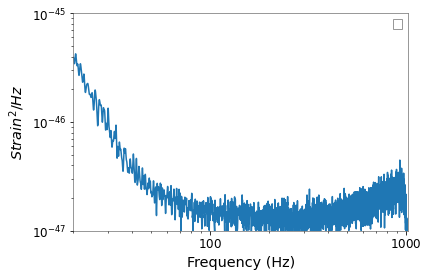

In [33]:
psd = conditioned.psd(4)
psd = interpolate(psd, conditioned.delta_f)
psd = inverse_spectrum_truncation(psd, int(4 * conditioned.sample_rate), low_frequency_cutoff=15)
pylab.plot(psd.sample_frequencies, psd)
pylab.yscale('log')
pylab.xscale('log')
pylab.ylim(1e-47, 1e-45)
pylab.xlim(20, 1024)
pylab.ylabel('$Strain^2 / Hz$')
pylab.xlabel('Frequency (Hz)')
pylab.grid()
pylab.legend()
pylab.show()

In [34]:
snr = matched_filter(template, conditioned, psd=psd, low_frequency_cutoff=20)
snr = snr.crop(4 + 4, 4)

peak = abs(snr).numpy().argmax()
snrp = snr[peak]
time = snr.sample_times[peak]

print("Mass: {}. We found a signal at {}s with SNR {}".format(m, time, abs(snrp)))

Mass: 30. We found a signal at -14.6328125s with SNR 22.038591197432353
